In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score
import matplotlib.pyplot as plt

In [27]:
# Loading the Data : 
data = pd.read_csv('/content/drive/MyDrive/Tabular Playground Series - May 2022/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Tabular Playground Series - May 2022/test.csv')
data.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,target
0,0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,...,-2.540739,0.766952,-2.730628,-0.208177,1.363402,ABABDADBAB,67.609153,0,0,0
1,1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,...,2.278315,-0.633658,-1.217077,-3.782194,-0.058316,ACACCADCEB,377.096415,0,0,1
2,2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,...,-1.385775,-0.520558,-0.009121,2.788536,-3.703488,AAAEABCKAD,-195.599702,0,2,1
3,3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,...,0.572594,-1.653213,1.686035,-2.533098,-0.608601,BDBBAACBCB,210.826205,0,0,1
4,4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,...,-3.912929,-1.430366,2.127649,-3.306784,4.371371,BDBCBBCHFE,-217.211798,0,1,1


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 33 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      900000 non-null  int64  
 1   f_00    900000 non-null  float64
 2   f_01    900000 non-null  float64
 3   f_02    900000 non-null  float64
 4   f_03    900000 non-null  float64
 5   f_04    900000 non-null  float64
 6   f_05    900000 non-null  float64
 7   f_06    900000 non-null  float64
 8   f_07    900000 non-null  int64  
 9   f_08    900000 non-null  int64  
 10  f_09    900000 non-null  int64  
 11  f_10    900000 non-null  int64  
 12  f_11    900000 non-null  int64  
 13  f_12    900000 non-null  int64  
 14  f_13    900000 non-null  int64  
 15  f_14    900000 non-null  int64  
 16  f_15    900000 non-null  int64  
 17  f_16    900000 non-null  int64  
 18  f_17    900000 non-null  int64  
 19  f_18    900000 non-null  int64  
 20  f_19    900000 non-null  float64
 21  f_20    90

In [29]:
data.isna().sum()

id        0
f_00      0
f_01      0
f_02      0
f_03      0
f_04      0
f_05      0
f_06      0
f_07      0
f_08      0
f_09      0
f_10      0
f_11      0
f_12      0
f_13      0
f_14      0
f_15      0
f_16      0
f_17      0
f_18      0
f_19      0
f_20      0
f_21      0
f_22      0
f_23      0
f_24      0
f_25      0
f_26      0
f_27      0
f_28      0
f_29      0
f_30      0
target    0
dtype: int64

In [30]:
# data = data[:3000]

In [31]:
data.shape

(900000, 33)

In [32]:
data['target'].value_counts()

0    462161
1    437839
Name: target, dtype: int64

In [33]:
data = data.drop(columns = ['f_27'])

In [34]:
data.shape

(900000, 32)

# **DATA PREPROCESSING**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


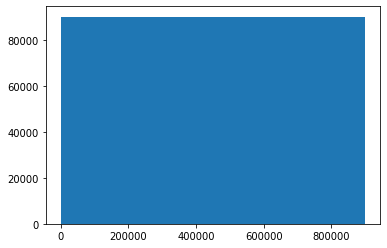

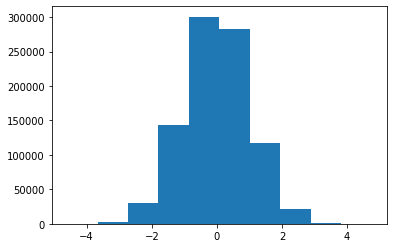

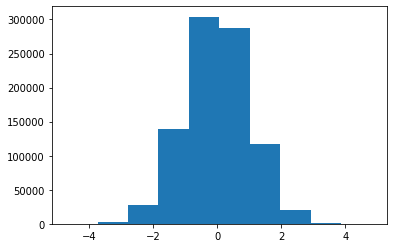

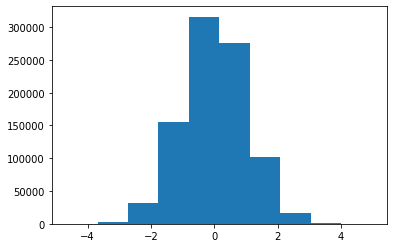

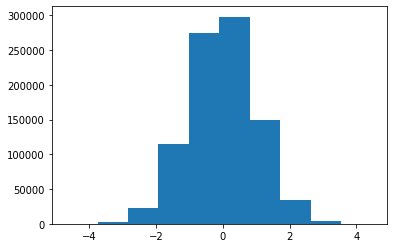

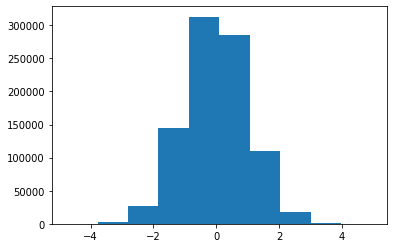

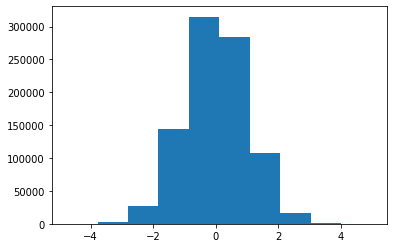

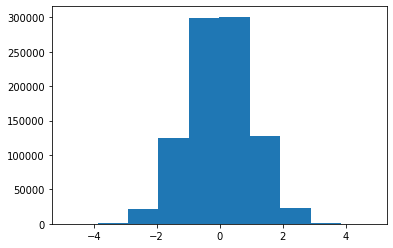

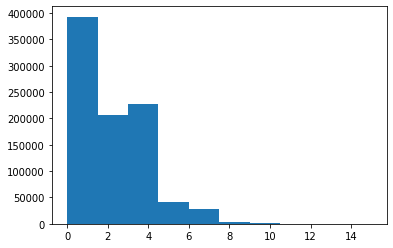

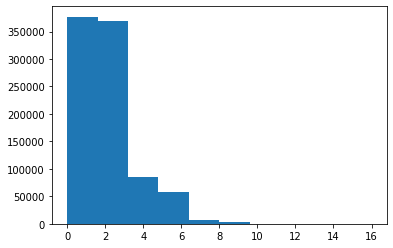

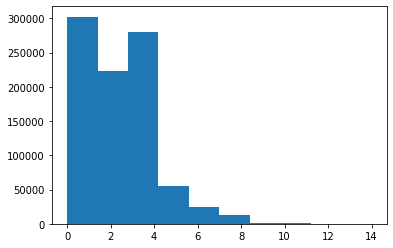

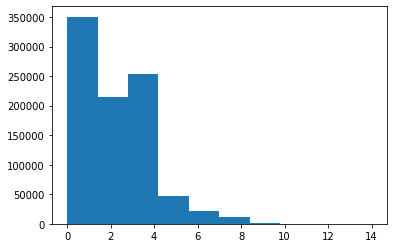

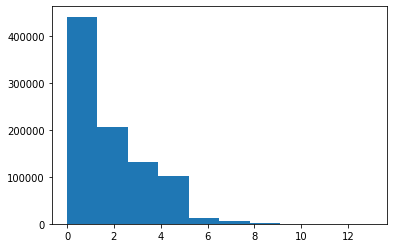

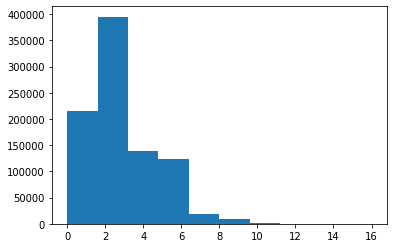

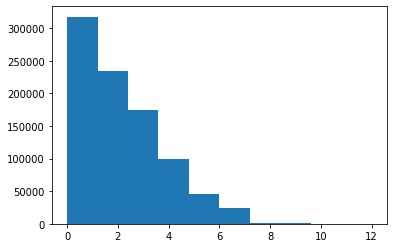

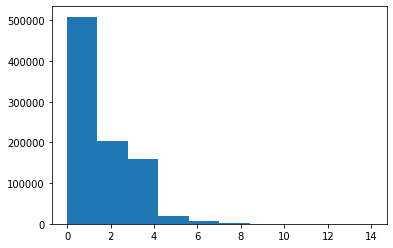

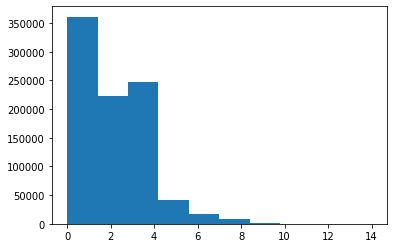

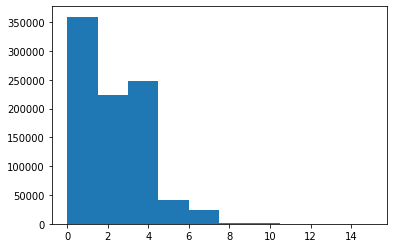

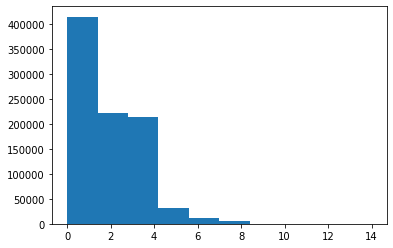

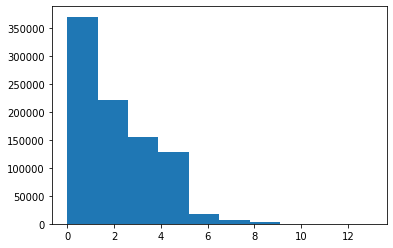

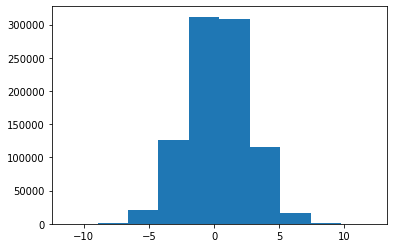

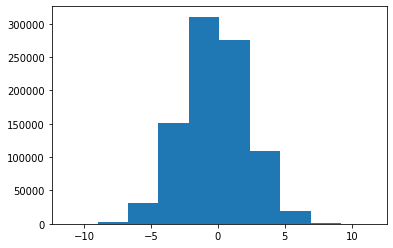

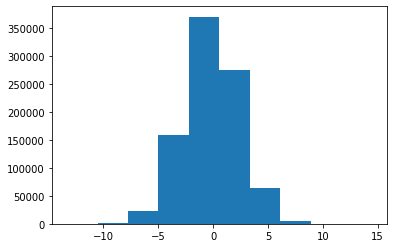

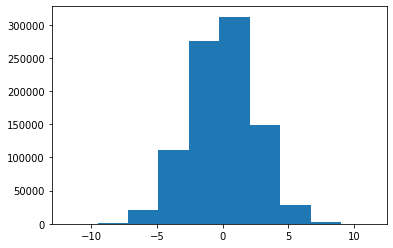

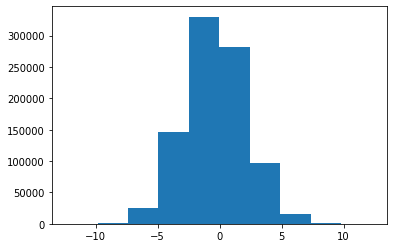

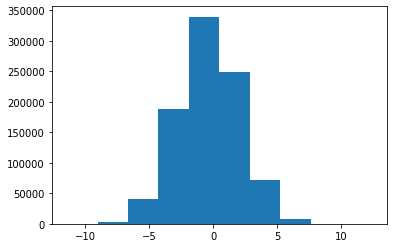

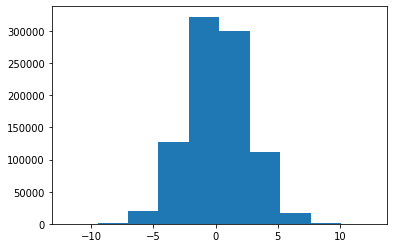

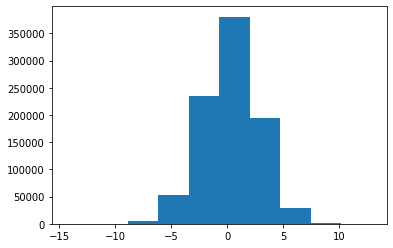

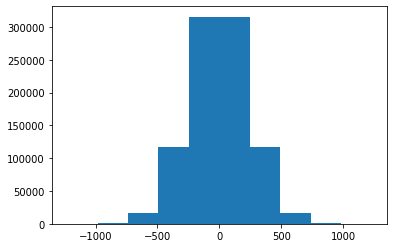

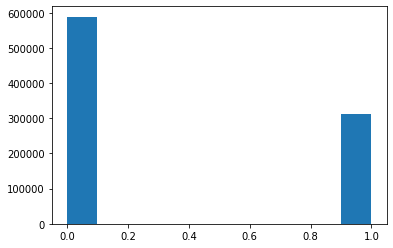

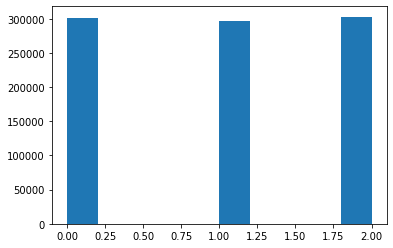

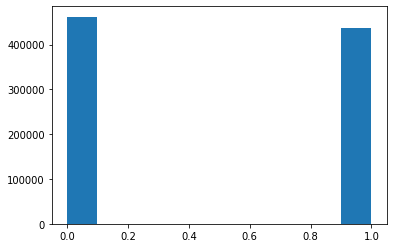

In [35]:
for i in data.columns:
    plt.figure()
    plt.hist(data[i])

In [36]:
# To define the input and output feature
x = data.drop(['id','target'],axis=1)
y = data.target
# train and test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [37]:
len(x_train),len(x_test),len(y_train),len(y_test)

(720000, 180000, 720000, 180000)

In [38]:
test_data.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30
0,900000,0.442517,0.174380,-0.999816,0.762741,0.186778,-1.074775,0.501888,6,6,...,-1.006400,-1.193879,-2.435736,-2.427430,-1.966887,5.734205,BAAABADLAC,99.478419,0,0
1,900001,-0.605598,-0.305715,0.627667,-0.578898,-1.750931,1.355550,-0.190911,1,3,...,2.382405,0.149442,1.883322,-2.848714,-0.725155,3.194219,AFABBAEGCB,-65.993825,1,0
2,900002,0.303990,2.445110,0.246515,0.818248,0.359731,-1.331845,1.358622,3,3,...,-7.026098,1.312277,-5.157192,1.714005,0.585032,0.066898,BBACABBKEE,-87.405622,0,1
3,900003,0.154053,0.260126,-1.367092,-0.093175,-1.111034,-0.948481,1.119220,0,0,...,-0.594532,-3.939475,1.754570,-2.364007,-1.003320,3.893099,AEBEAACQCC,-281.293460,0,0
4,900004,-1.651904,-0.424266,-0.667356,-0.322124,-0.089462,0.181705,1.784983,2,2,...,0.084906,-0.985736,-0.130467,-3.557893,1.210687,1.861884,AEBBBBDABF,25.629415,0,2


In [39]:
test_data = test_data.drop(columns = ['f_27'])

In [40]:
id = test_data['id']
test_data = test_data.drop(columns = ['id'])
test_data.head()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_28,f_29,f_30
0,0.442517,0.174380,-0.999816,0.762741,0.186778,-1.074775,0.501888,6,6,0,...,2.749347,-1.006400,-1.193879,-2.435736,-2.427430,-1.966887,5.734205,99.478419,0,0
1,-0.605598,-0.305715,0.627667,-0.578898,-1.750931,1.355550,-0.190911,1,3,4,...,1.080762,2.382405,0.149442,1.883322,-2.848714,-0.725155,3.194219,-65.993825,1,0
2,0.303990,2.445110,0.246515,0.818248,0.359731,-1.331845,1.358622,3,3,4,...,-1.406712,-7.026098,1.312277,-5.157192,1.714005,0.585032,0.066898,-87.405622,0,1
3,0.154053,0.260126,-1.367092,-0.093175,-1.111034,-0.948481,1.119220,0,0,4,...,3.011085,-0.594532,-3.939475,1.754570,-2.364007,-1.003320,3.893099,-281.293460,0,0
4,-1.651904,-0.424266,-0.667356,-0.322124,-0.089462,0.181705,1.784983,2,2,2,...,0.100594,0.084906,-0.985736,-0.130467,-3.557893,1.210687,1.861884,25.629415,0,2


**SUPPORT VECTOR MACHINES**

In [ ]:
from sklearn import svm

In [ ]:
# Initialize SVM classifier
clf = svm.LinearSVC(verbose=20,random_state=42,C=0.5,max_iter=2500)

In [ ]:
clf = clf.fit(x_train, y_train)

[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
print('Training accuracy SVM {:.4f}'.format(clf.score(x_train,y_train)))
print('Testing accuracy SVM {:.4f}'.format(clf.score(x_test,y_test)))

pred = clf.predict(x_test)

print(confusion_matrix(y_test,pred))

print(classification_report(y_test,pred))

Training accuracy SVM 0.5455
Testing accuracy SVM 0.5437
[[53898 38567]
 [43569 43966]]
              precision    recall  f1-score   support

           0       0.55      0.58      0.57     92465
           1       0.53      0.50      0.52     87535

    accuracy                           0.54    180000
   macro avg       0.54      0.54      0.54    180000
weighted avg       0.54      0.54      0.54    180000



### **RANDOM FORESTS**

In [ ]:
!pip install tensorflow==2.9.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip3 install tensorflow_decision_forests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install tensorflow_addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 787 kB 4.3 MB/s 
  Attempting uninstall: tensorflow-addons
    Found existing installation: tensorflow-addons 0.17.0
    Uninstalling tensorflow-addons-0.17.0:
      Successfully uninstalled tensorflow-addons-0.17.0


In [ ]:
import math

import warnings
warnings.filterwarnings('ignore')
# import tensorflow_addons
from tensorflow.keras.layers import StringLookup
import tensorflow as tf

# from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import metrics

import tensorflow_decision_forests as tfdf

NotFoundError: ignored

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Tabular Playground Series - May 2022/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Tabular Playground Series - May 2022/test.csv')
train.drop(['f_03', 'f_04', 'f_05', 'f_27'], axis=1, inplace=True)
test.drop(['f_03', 'f_04', 'f_05', 'f_27'], axis=1, inplace=True)

In [ ]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(data, label="target")
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_data)

In [ ]:
model = tfdf.keras.RandomForestModel()
model.fit(train_ds, verbose=1)

In [ ]:
model.summary()

In [ ]:
tfdf.model_plotter.plot_model_in_colab(model, tree_idx=0)

In [ ]:
pred = model.predict(test_ds)

In [ ]:
pred

In [ ]:
len(pred),len(y_test)

(700000, 180000)

In [ ]:
print('Training accuracy {:.4f}'.format(model.score(x_train,y_train)))
print('Testing accuracy  {:.4f}'.format(model.score(x_test,y_test)))

pred = model.predict(x_test)

print(confusion_matrix(test['target'],pred))

print(classification_report(y_test,pred))

KeyError: ignored

### **Baseline with fast AutoML: FLAML**

In [ ]:
# base
import pandas as pd
import numpy as np
import os
import random

# flaml
!pip install flaml
!pip install -U scikit-learn
from flaml import AutoML

# warning
import warnings
warnings.simplefilter('ignore')

# parameters
SEED = 2022
FOLDS = 5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 195 kB 4.2 MB/s 
     |████████████████████████████████| 2.0 MB 37.7 MB/s 
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 2.2.3
    Uninstalling lightgbm-2.2.3:
      Successfully uninstalled lightgbm-2.2.3


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Initialize an AutoML instance
automl = AutoML()

# Specify automl goal and constraint
automl_settings = {
    "time_budget": 60*10,  # in seconds
    "metric": 'roc_auc',
    "task": 'classification',
    "n_jobs": -1,
    "eval_method": 'cv',
    "n_splits": FOLDS,
    "seed" : SEED}

# Train with labeled input data
automl.fit(x_train,y_train, test_data, **automl_settings)

[flaml.automl: 06-03 04:16:29] {2373} INFO - task = classification
INFO:flaml.automl:task = classification
[flaml.automl: 06-03 04:16:29] {2375} INFO - Data split method: stratified
INFO:flaml.automl:Data split method: stratified
[flaml.automl: 06-03 04:16:29] {2379} INFO - Evaluation method: cv
INFO:flaml.automl:Evaluation method: cv
[flaml.automl: 06-03 04:16:30] {2448} INFO - Minimizing error metric: 1-roc_auc
INFO:flaml.automl:Minimizing error metric: 1-roc_auc
[flaml.automl: 06-03 04:16:30] {2586} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
INFO:flaml.automl:List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl: 06-03 04:16:30] {2878} INFO - iteration 0, current learner lgbm
INFO:flaml.automl:iteration 0, current learner lgbm
[flaml.automl: 06-03 04:16:52] {3009} INFO - Estimated sufficient time budget=225239s. Estimated necessary time budget=5192s.
INFO:fla

In [ ]:
print('Best ML leaner:', automl.best_estimator)
print('Best hyperparmeter config:', automl.best_config)
print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))

Best ML leaner: lgbm
Best hyperparmeter config: {'n_estimators': 66, 'num_leaves': 58, 'min_child_samples': 14, 'learning_rate': 0.26009533770247295, 'log_max_bin': 10, 'colsample_bytree': 0.6715706464701924, 'reg_alpha': 2.55996344189801, 'reg_lambda': 1.4730566495130832}
Training duration of best run: 14.91 s


In [ ]:
# Make prediction
pred= automl.predict(x_test)

In [ ]:
len(pred)

180000

In [ ]:
print('Training accuracy  {:.4f}'.format(automl.score(x_train,y_train)))
print('Testing accuracy  {:.4f}'.format(automl.score(x_test,y_test)))

pred = automl.predict(x_test)

print(confusion_matrix(y_test,pred))

print(classification_report(y_test,pred))

Training accuracy LIGHTGBM 0.8482
Testing accuracy LIGHTGBM 0.8411
[[78720 13745]
 [14850 72685]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.85     92465
           1       0.84      0.83      0.84     87535

    accuracy                           0.84    180000
   macro avg       0.84      0.84      0.84    180000
weighted avg       0.84      0.84      0.84    180000



### **LGBMClassifier**

In [41]:
model = lgb.LGBMClassifier(boosting_type='gbdt',n_estimators=3000,objective='binary',learning_rate=0.2,max_depth=-1,random_state=42)
model.fit(x_train,y_train,eval_set=[(x_test,y_test),(x_train,y_train)],
          verbose=20,eval_metric='logloss')

[20]	training's binary_logloss: 0.511765	training's binary_logloss: 0.511765	valid_0's binary_logloss: 0.513587	valid_0's binary_logloss: 0.513587
[40]	training's binary_logloss: 0.456341	training's binary_logloss: 0.456341	valid_0's binary_logloss: 0.459251	valid_0's binary_logloss: 0.459251
[60]	training's binary_logloss: 0.42944	training's binary_logloss: 0.42944	valid_0's binary_logloss: 0.4332	valid_0's binary_logloss: 0.4332
[80]	training's binary_logloss: 0.411935	training's binary_logloss: 0.411935	valid_0's binary_logloss: 0.41657	valid_0's binary_logloss: 0.41657
[100]	training's binary_logloss: 0.398927	training's binary_logloss: 0.398927	valid_0's binary_logloss: 0.404231	valid_0's binary_logloss: 0.404231
[120]	training's binary_logloss: 0.389963	training's binary_logloss: 0.389963	valid_0's binary_logloss: 0.396202	valid_0's binary_logloss: 0.396202
[140]	training's binary_logloss: 0.383047	training's binary_logloss: 0.383047	valid_0's binary_logloss: 0.390189	valid_0's b

LGBMClassifier(learning_rate=0.2, n_estimators=3000, objective='binary',
               random_state=42)

In [42]:
print('Training accuracy LIGHTGBM {:.4f}'.format(model.score(x_train,y_train)))
print('Testing accuracy LIGHTGBM {:.4f}'.format(model.score(x_test,y_test)))

pred = model.predict(x_test)

print(confusion_matrix(y_test,pred))

print(classification_report(y_test,pred))

Training accuracy LIGHTGBM 0.9326
Testing accuracy LIGHTGBM 0.8770
[[81851 10614]
 [11517 76018]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.88     92465
           1       0.88      0.87      0.87     87535

    accuracy                           0.88    180000
   macro avg       0.88      0.88      0.88    180000
weighted avg       0.88      0.88      0.88    180000



In [45]:
pred_test = model.predict(test_data)

In [46]:
pred_test
results = pd.DataFrame(pred_test, columns = ['target'])
results.head()

,target
0,1
1,1
2,0
3,0
4,1


In [47]:
result = pd.concat([id,results],axis=1, join='inner')
result.head()

,id,target
0,900000,1
1,900001,1
2,900002,0
3,900003,0
4,900004,1


In [48]:
result.to_csv('/content/drive/MyDrive/Tabular Playground Series - May 2022/submission.csv',index=False)